# Introdução aos Ataques DDoS no Dataset CICDDoS2019

O dataset contém múltiplos cenários de ataques, registrados em arquivos CSV, com detalhes sobre tráfego malicioso e legítimo. Abaixo, são listados os períodos de tempo (em horas e minutos) em que os ataques ocorreram, organizados por dia e tipo de ataque.


## Ataques coloetados no dia (03/11)

Abaixo estão os períodos de tempo correspondentes aos ataques registrados em cada arquivo CSV no dia 03/11:

```csv
DrDos_NTP.csv, 10:35 - 10:45
DrDos_DNS.csv, 10:52 - 11:05
DrDos_LDAP.csv, 11:22 - 11:32
DrDos_MSSQL.csv, 11:36 - 11:45
DrDos_NetBIOS.csv, 11:50 - 12:00
DrDos_SNMP.csv, 12:12 - 12:23
DrDos_SSDP.csv, 12:27 - 12:37
DrDos_UDP.csv, 12:45 - 13:09
UDPLag.csv, 13:11 - 13:15
Syn.csv, 13:29 - 13:34
TFTP.csv, 13:35 - 17:15
```

## Ataques coloetados no dia (01/12)

Abaixo estão os períodos de tempo correspondentes aos ataques registrados em cada arquivo CSV no dia 01/12:

```csv
PortMap.csv, 09:43 - 09:51
DrDos_NetBIOS.csv, 10:00 - 10:09
DrDos_LDAP.csv, 10:21 - 10:30
DrDos_MSSQL.csv, 10:33 - 10:42
DrDos_UDP.csv, 10:53 - 11:03
DrDos_UDP-Lag.csv, 11:14 - 11:24
Syn.csv, 11:28 - 17:35
```

# Abrir arquivos

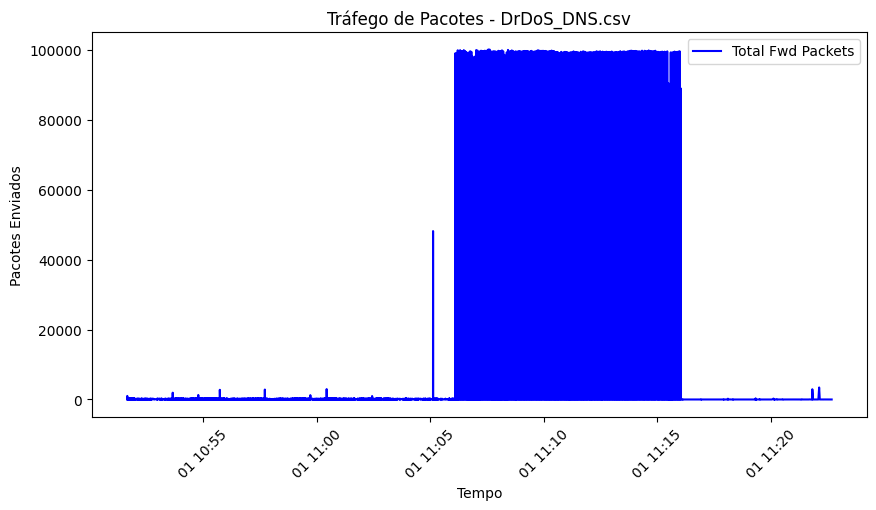

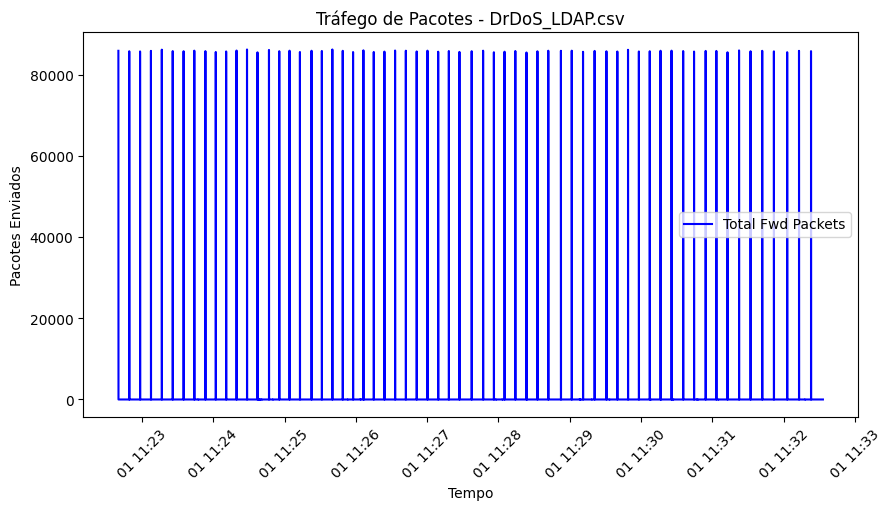

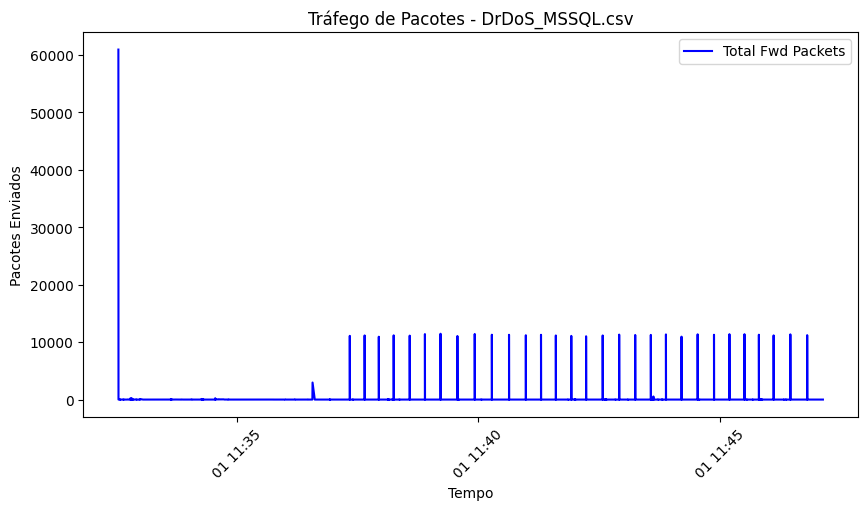

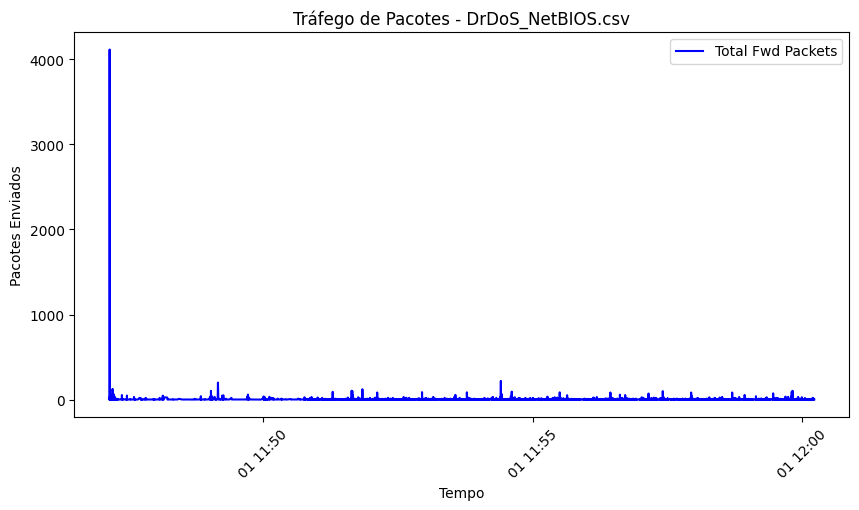

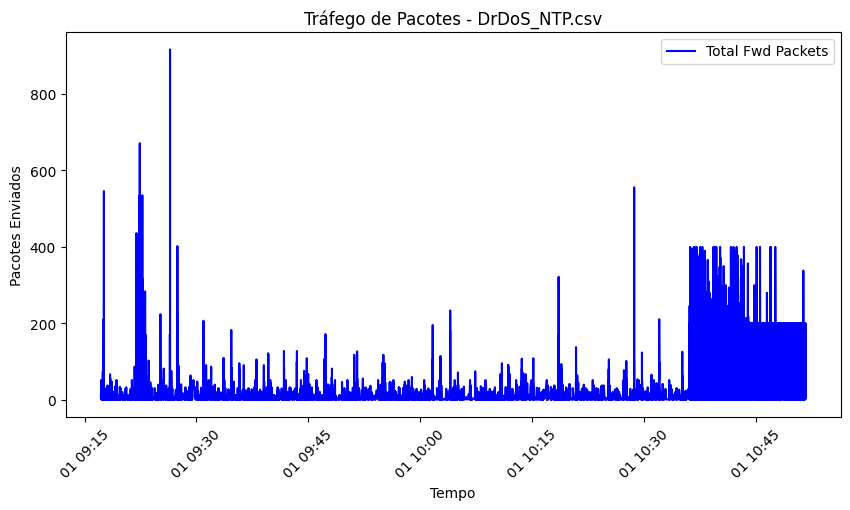

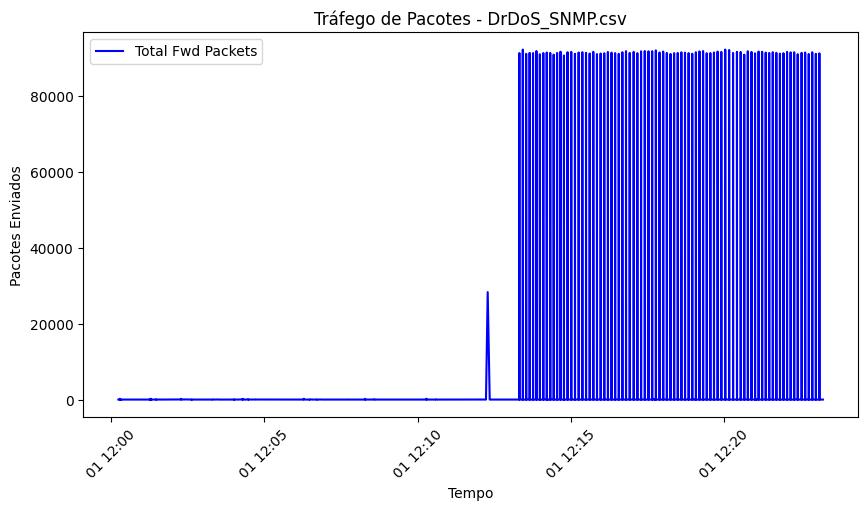

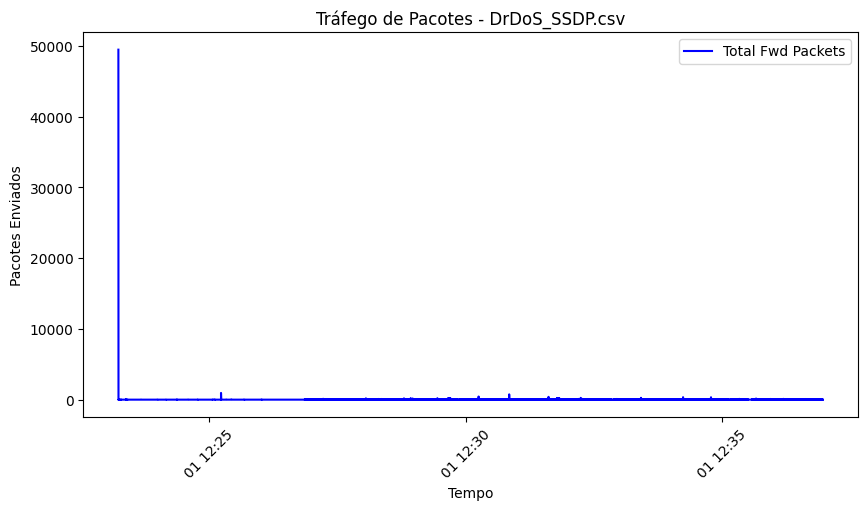

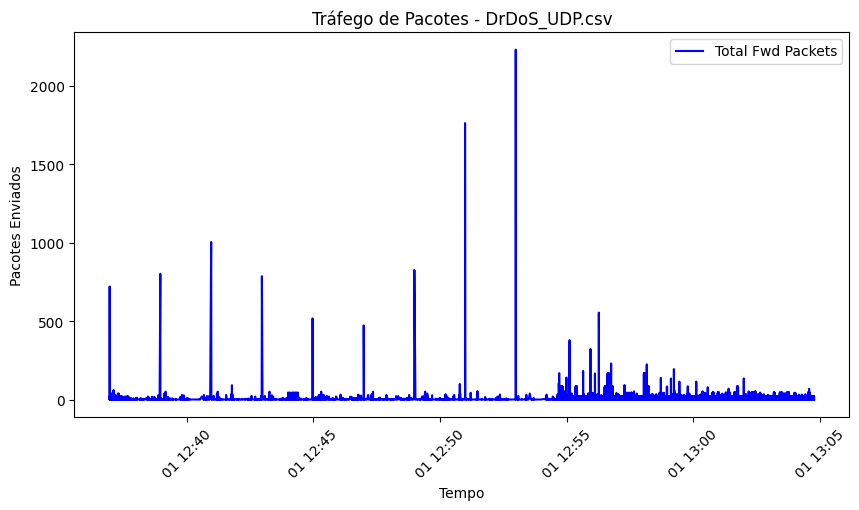

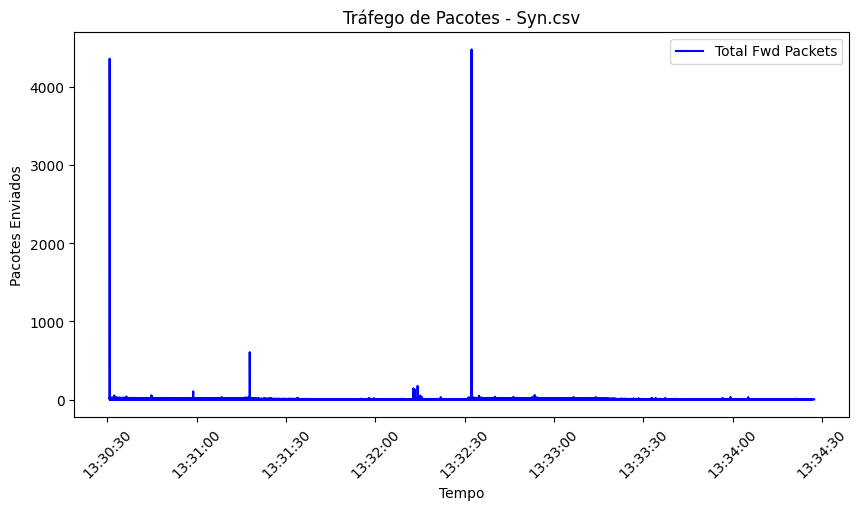

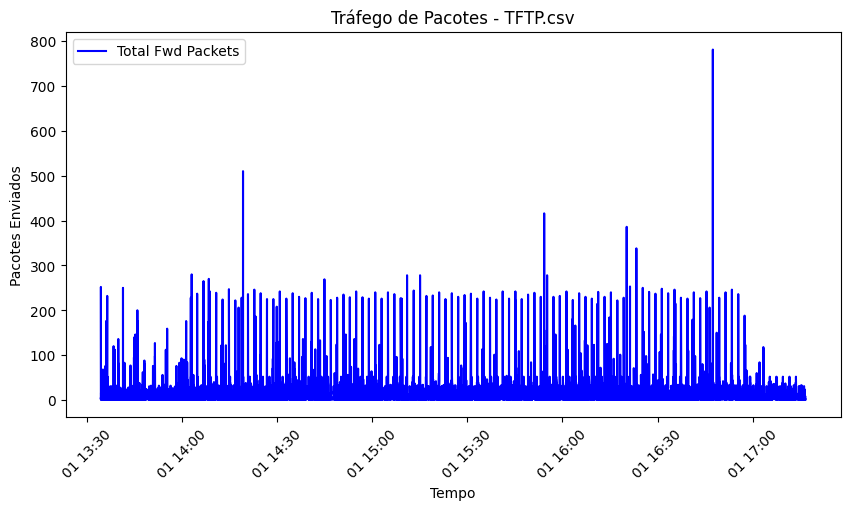

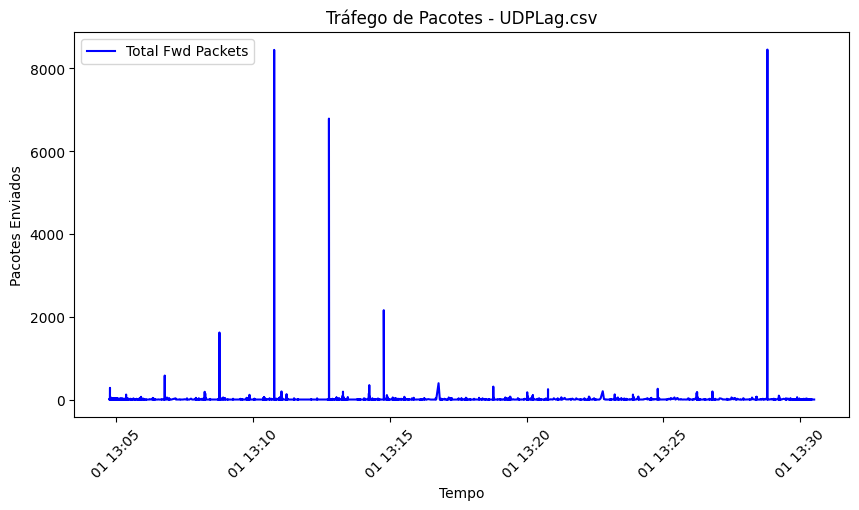

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt

data_path = os.path.join("data", "01-12")
csv_files = [f for f in os.listdir(data_path) if f.endswith(".csv")]

selected_columns = [
    "Flow ID", " Source IP", " Source Port", " Destination IP", 
    " Destination Port", " Protocol", " Timestamp", " Flow Duration",
    " Total Fwd Packets"
]

for file_name in csv_files:
    file_path = os.path.join(data_path, file_name)
    df = pd.read_csv(file_path, usecols=selected_columns)
    plt.figure(figsize=(10, 5))
    df["Timestamp"] = pd.to_datetime(df[" Timestamp"], errors="coerce")
    df = df.dropna(subset=["Timestamp"])
    
    plt.plot(df["Timestamp"], df[" Total Fwd Packets"], label="Total Fwd Packets", color="blue")
    plt.xlabel("Tempo")
    plt.ylabel("Pacotes Enviados")
    plt.title(f"Tráfego de Pacotes - {file_name}")
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()


# Concatenar os arquivos do dia 01/12 em ordem cronológica

In [ ]:
import pandas as pd
import os

data_path = "data/01-12"

files = [
    "DrDos_DNS.csv", "DrDos_LDAP.csv", "DrDos_MSSQL.csv",
    "DrDos_NetBIOS.csv", "DrDos_NTP.csv", "DrDos_SNMP.csv",
    "DrDos_SSDP.csv", "DrDos_UDP.csv", "Syn.csv",
    "TFTP.csv", "UDPLag.csv"
]

selected_columns = [
    "Flow ID", " Source IP", " Source Port", " Destination IP", 
    " Destination Port", " Protocol", " Timestamp", " Flow Duration",
    " Total Fwd Packets"
]

all_data = []

for file_name in files:
    file_path = os.path.join(data_path, file_name)
    
    if os.path.exists(file_path):
        try:
            df = pd.read_csv(file_path, usecols=selected_columns)
            df = df.rename(columns=lambda x: x.strip())
            df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce")
            all_data.append(df)
            print(f"{file_name} processado com {len(df)} linhas.")
        except Exception as e:
            print(f"Erro ao processar {file_name}: {e}")
    else:
        print(f"Arquivo não encontrado: {file_name}")

if all_data:
    final_df = pd.concat(all_data, ignore_index=True)
    final_df = final_df.sort_values(by="Timestamp")
    output_file = os.path.join(data_path, "combined_attacks_01_12.csv")
    final_df.to_csv(output_file, index=False)
    print(f"Arquivo combinado salvo corretamente em ordem cronológica: {output_file}")
else:
    print("Nenhum dado válido encontrado para gerar o arquivo combinado.")


❌ Erro ao processar DrDos_DNS.csv: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.
✔ DrDos_LDAP.csv processado com 2181542 linhas.
✔ DrDos_MSSQL.csv processado com 4524498 linhas.
❌ Erro ao processar DrDos_NetBIOS.csv: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.
✔ DrDos_NTP.csv processado com 1217007 linhas.


# Concatenar os arquivos do dia 03/11 em ordem cronológica

In [ ]:
import pandas as pd
import os

data_path = "data/03-11"

files = [
    "LDAP.csv", "MSSQL.csv", "NetBIOS.csv", "Portmap.csv",
    "Syn.csv", "UDP.csv", "UDPLag.csv"
]

selected_columns = [
    "Flow ID", " Source IP", " Source Port", " Destination IP", 
    " Destination Port", " Protocol", " Timestamp", " Flow Duration",
    " Total Fwd Packets"
]

all_data = []

for file_name in files:
    file_path = os.path.join(data_path, file_name)
    
    if os.path.exists(file_path):
        try:
            df = pd.read_csv(file_path, usecols=selected_columns)
            df = df.rename(columns=lambda x: x.strip())
            df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce")
            all_data.append(df)
            print(f"{file_name} processado com {len(df)} linhas.")
        except Exception as e:
            print(f"Erro ao processar {file_name}: {e}")
    else:
        print(f"Arquivo não encontrado: {file_name}")

if all_data:
    final_df = pd.concat(all_data, ignore_index=True)
    final_df = final_df.sort_values(by="Timestamp")
    output_file = os.path.join(data_path, "combined_attacks_03_11.csv")
    final_df.to_csv(output_file, index=False)
    print(f"Arquivo combinado salvo corretamente em ordem cronológica: {output_file}")
else:
    print("Nenhum dado válido encontrado para gerar o arquivo combinado.")


# Plot de arquivos

50063112


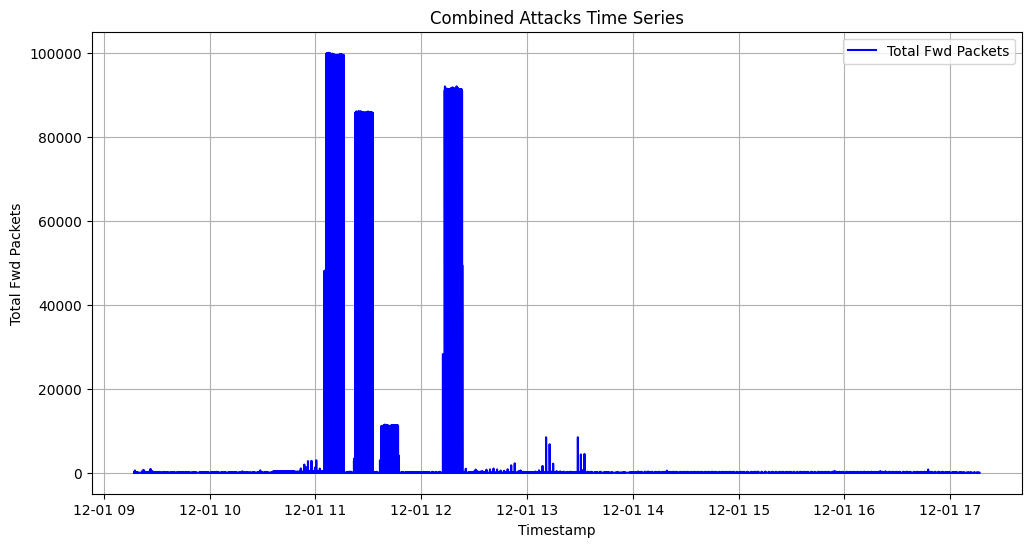

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

combined_df = pd.read_csv("data/combined_attacks_01.csv")
combined_df["Timestamp"] = pd.to_datetime(combined_df["Timestamp"])
combined_df.set_index("Timestamp", inplace=True)
combined_df = combined_df.sort_index()
print(len(combined_df))

plt.figure(figsize=(12, 6))
plt.plot(combined_df.index, combined_df["Total Fwd Packets"], label="Total Fwd Packets", color="blue")

plt.xlabel("Timestamp")
plt.ylabel("Total Fwd Packets")
plt.title("Combined Attacks Time Series")
plt.legend()
plt.grid()
plt.show()
